In [1]:
%matplotlib inline
from kid_readout.measurement.io import npy

In [2]:
npd = npy.NumpyDirectory('/data/detectors/2016-11-18_180706_filterbank_bin/')

In [3]:
npd.node_names()

['StreamArray0',
 'ADCSnap1',
 'StreamArray2',
 'ADCSnap3',
 'StreamArray4',
 'ADCSnap5',
 'StreamArray6',
 'ADCSnap7',
 'StreamArray8',
 'ADCSnap9',
 'StreamArray10',
 'ADCSnap11',
 'StreamArray12',
 'ADCSnap13',
 'StreamArray14',
 'ADCSnap15',
 'StreamArray16',
 'ADCSnap17',
 'StreamArray18',
 'ADCSnap19',
 'StreamArray20',
 'ADCSnap21',
 'StreamArray22',
 'ADCSnap23',
 'StreamArray24',
 'ADCSnap25',
 'StreamArray26',
 'ADCSnap27',
 'StreamArray28',
 'ADCSnap29',
 'StreamArray30',
 'ADCSnap31',
 'StreamArray32',
 'ADCSnap33']

In [4]:
streams = [npd.read(name)[0] for name in npd.node_names() if name.startswith('StreamArray')]
snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [5]:
[(snap.x.ptp(), snap.y.ptp()) for snap in snaps]

[(1233.0, 1223.0),
 (1232.0, 1222.0),
 (1234.0, 1220.0),
 (1233.0, 1218.0),
 (1232.0, 1221.0),
 (1232.0, 1223.0),
 (1232.0, 1219.0),
 (1232.0, 1220.0),
 (1230.0, 1222.0),
 (1233.0, 1221.0),
 (1231.0, 1223.0),
 (1230.0, 1220.0),
 (1232.0, 1224.0),
 (1230.0, 1219.0),
 (1233.0, 1219.0),
 (1231.0, 1221.0),
 (1231.0, 1221.0)]

(-32768, 32768)

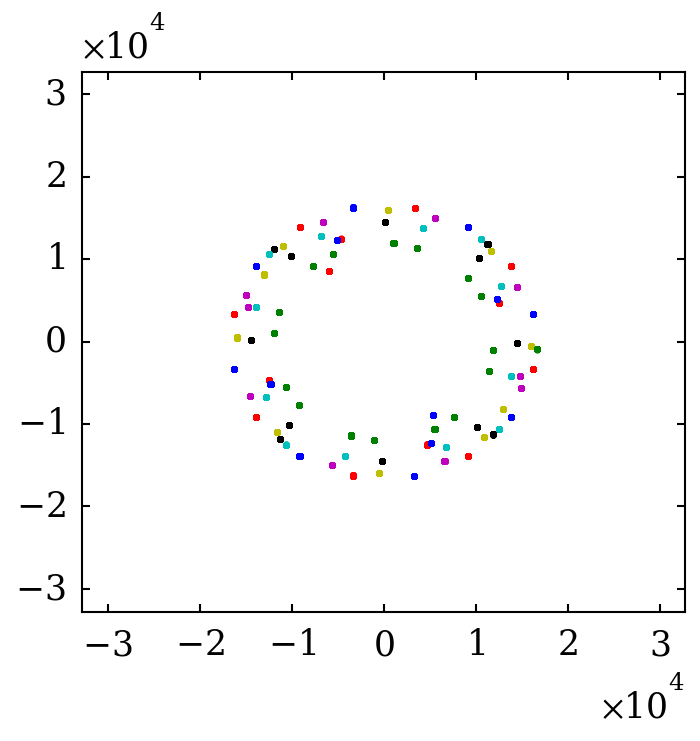

In [6]:
fig, ax = plt.subplots(figsize=(3, 3))
for stream in streams:
    ax.plot(stream.s21_raw.real, stream.s21_raw.imag, '.')
ax.set_xlim(-2**15, 2**15)
ax.set_ylim(-2**15, 2**15)
#ax.legend(loc='best', fontsize=3)

In [15]:
[stream.filterbank_bin for stream in streams]

[3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200,
 3200]

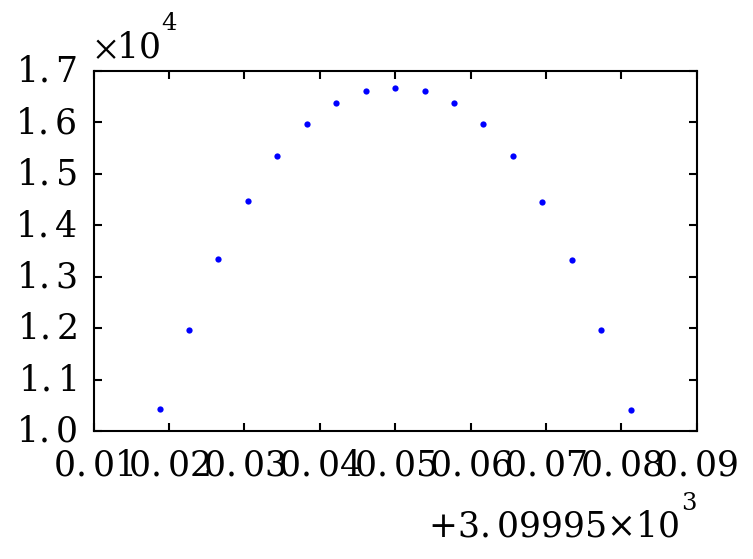

In [11]:
fig, ax = plt.subplots()
for stream in streams:
    ax.plot(stream.frequency_MHz, np.abs(stream.s21_raw).mean(), '.b')

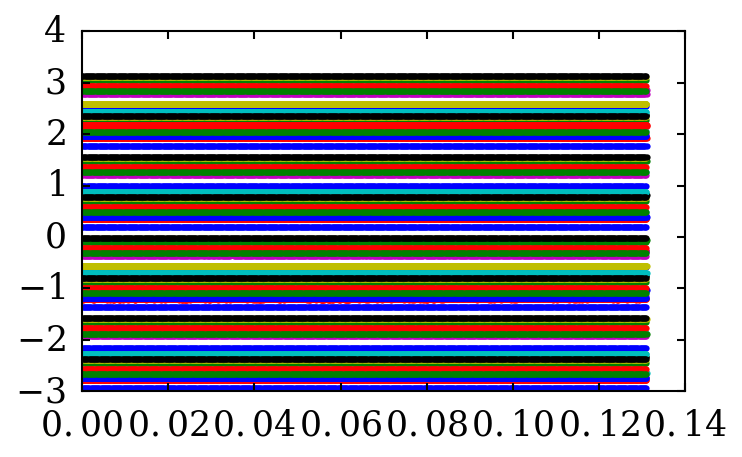

In [8]:
fig, ax = plt.subplots()
for stream in streams:
    ax.plot(stream.sample_time, np.angle(stream.s21_raw), '.')

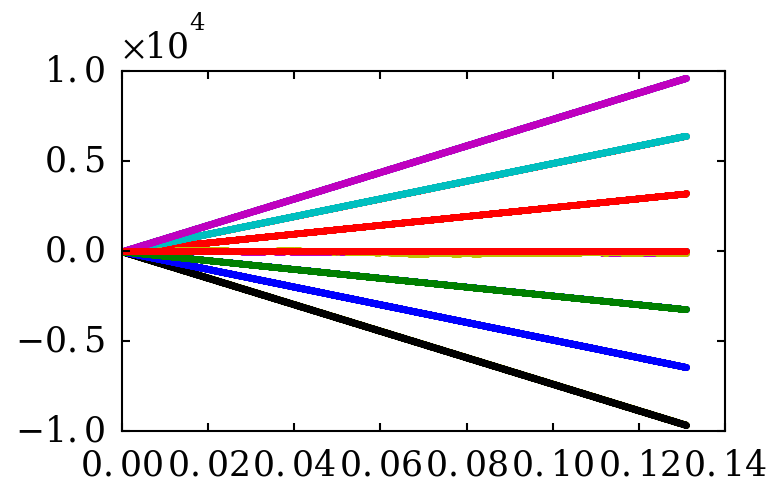

In [16]:
fig, ax = plt.subplots()
for stream in streams:
    ax.plot(stream.sample_time, np.unwrap(np.angle(stream.s21_raw)), '.')